Cloning into 'Stocktwit-Data-Sentiment-Analysis'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
files = ['file1.json', 'file2.json', 'file3.json', 'file4.json', 'file5.json', 
         'file6.json', 'file7.json', 'file8.json', 'file9.json', 
         'file10.json', 'file11.json','file12.json', 'file13.json',
         'file14.json', 'file15.json', 'file16.json', 'file17.json', 
         'file18.json','file19.json','file20.json','file21.json','file22.json',
         'file23.json','file24.json','file25.json','file26.json','file27.json', 'file28.json',
         'file29.json', 'file30.json', 'file31.json', 'file32.json', 'file33.json',
         'file34.json', 'file35.json', 'file36.json', 'file37.json', 'file38.json', 'file39.json',
         'file40.json', 'file41.json', 'file42.json', 'file43.json', 'file44.json', 'file45.json',
         'file46.json', 'file47.json', 'file48.json', 'file49.json', 'file50.json','file51.json',
         'file52.json', 'file53.json', 'file54.json', 'file55.json', 'file56.json', 'file57.json',
         'file58.json', 'file59.json', 'file60.json', 'file61.json', 'file62.json', 'file63.json', 
         'file64.json', 'file65.json', 'file66.json', 'file67.json', 'file68.json', 'file69.json',
         'file70.json', 'file71.json', 'file72.json','file73.json','file74.json','file75.json','file76.json',
         'file77.json','file78.json',  'file79.json','file80.json','file81.json',
         'file82.json','file82.json',  'file83.json','file84.json','file85.json',
         'file86.json','file87.json',  'file88.json','file89.json','file90.json',
         'file91.json','file91.json',  'file92.json','file93.json','file94.json',
         'file95.json','file96.json',  'file97.json','file98.json','file99.json',
         'file100.json','file101.json','file102.json','file103.json','file104.json',
         'file105.json','file106.json','file107.json','file108.json','file109.json','file110.json',
         'file111.json','file112.json','file113.json','file114.json','file115.json','file116.json',
         'file117.json','file118.json','file119.json','file120.json','file121.json','file122.json',
         'file123.json','file124.json','file125.json','file126.json','file127.json','file128.json',
         'file129.json','file130.json', 'file131.json','file132.json','file133.json','file134.json',
         'file135.json','file136.json','file137.json','file138.json','file139.json','file140.json',
         'file141.json','file142.json','file143.json','file144.json','file145.json','file146.json',
         'file147.json','file148.json','file149.json','file150.json','file151.json','file152.json',
         'file153.json','file154.json','file155.json','file156.json','file157.json','file158.json',
         'file159.json','file160.json','file161.json'
    ]

In [3]:
def stripper(x):
    if (x != None):
        return x['basic']
    else:
        return x

In [4]:
arr = []
for file in files:
    with open(file, "r") as read_file:
        data = json.load(read_file)
        
        for row in data:
            temp = {
                "created_at": row['created_at'],
                "user_id": row['user']['id'],
                "username": row['user']['username'],
                "stocktwit": row['body'],
                "sentiment": row['entities']['sentiment']
            }
            arr.append(temp)
        
    
df = pd.DataFrame(arr)

In [5]:
df['sentiment'] = df['sentiment'].apply(lambda x: stripper(x))

In [6]:
print('--Print the Basic Info of the data ---')
print('----------------------------------------')
print(df.info())
print('----------------Data dimension------------------------')
print(df.shape)
print('------------------------------------------------------')

--Print the Basic Info of the data ---
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4890 entries, 0 to 4889
Data columns (total 5 columns):
created_at    4890 non-null object
sentiment     1800 non-null object
stocktwit     4890 non-null object
user_id       4890 non-null int64
username      4890 non-null object
dtypes: int64(1), object(4)
memory usage: 191.1+ KB
None
----------------Data dimension------------------------
(4890, 5)
------------------------------------------------------


In [7]:
df.dropna(axis=0, inplace=True)

In [8]:
pd.DataFrame(df.columns,columns=['DATA SET COLUMNS'], index=[1,2,3,4,5])

,DATA SET COLUMNS
1,created_at
2,sentiment
3,stocktwit
4,user_id
5,username


In [9]:
df['length'] = df['stocktwit'].apply(len)

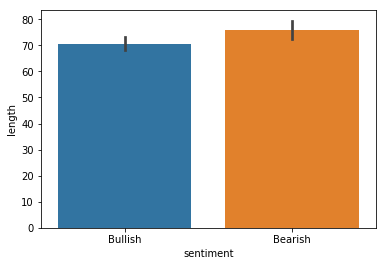

In [10]:
sns.barplot(data=df, x='sentiment', y='length' )

In [11]:
print("Number of Missing Values: ",df['sentiment'].isnull().values.ravel().sum())

Number of Missing Values:  0


In [12]:
df.describe()

,user_id,length
count,1.800000e+03,1800.000000
mean,1.118727e+06,72.304444
std,4.785595e+05,42.330243
min,6.273700e+04,4.000000
25%,7.205740e+05,37.000000
50%,1.271536e+06,68.000000
75%,1.494507e+06,106.000000
max,1.780929e+06,241.000000


In [13]:
len(df)

1800

In [14]:
df.groupby('sentiment').describe()

length                                                       \
            count       mean        std  min   25%   50%    75%    max   
sentiment                                                                
Bearish     558.0  75.944444  41.816159  4.0  41.0  76.0  108.0  169.0   
Bullish    1242.0  70.669082  42.474403  4.0  34.0  65.0  105.0  241.0   

          user_id                                                             \
            count          mean            std      min       25%        50%   
sentiment                                                                      
Bearish     558.0  1.101680e+06  504944.430485  63619.0  713758.0  1245112.0   
Bullish    1242.0  1.126386e+06  466226.749302  62737.0  739083.0  1280283.0   

                                 
                 75%        max  
sentiment                        
Bearish    1542428.0  1776306.0  
Bullish    1465241.0  1780929.0

AxesSubplot(0.125,0.125;0.775x0.755)
Text(0.5, 1.0, 'Histogram showing Length of messages')


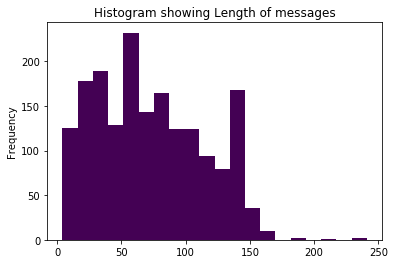

In [15]:
print(df['length'].plot(bins=20, kind='hist', colormap='viridis') )
print(plt.title('Histogram showing Length of messages'))

In [16]:
df['length'].describe()

count    1800.000000
mean       72.304444
std        42.330243
min         4.000000
25%        37.000000
50%        68.000000
75%       106.000000
max       241.000000
Name: length, dtype: float64

In [44]:
import datetime as datetime

In [45]:
import datetime
import time

In [46]:
df['new date'] = [d.date() for d in df['created_at']]
df['new time '] = [d.time() for d in df['created_at']]

AttributeError: 'str' object has no attribute 'date'

In [80]:
df[df['length'] == 241]

,created_at,sentiment,stocktwit,user_id,username,length
1920,2018-12-12T10:00:02Z,Bullish,Cannabis Stocks Move Amid Report Cuomo Will Pr...,447907,rbuckner,241
1951,2018-12-12T10:00:02Z,Bullish,Cannabis Stocks Move Amid Report Cuomo Will Pr...,447907,rbuckner,241


In [81]:
import string

mess = 'Sample message! Notice: it has punctuation.'
# Check characters to see if they are in punctuation
nopunc = [char for char in mess if char not in string.punctuation]


# Join the characters again to form the string.
nopunc = ''.join(nopunc)

from nltk.corpus import stopwords
stopwords.words('english')[0:5] # Show some stop words

['i', 'me', 'my', 'myself', 'we']

In [82]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [83]:
# Now just remove any stopwords
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [84]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [85]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    #check to see if characters are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]
    
    #Join the characters again to form a string
    nopunc = ''.join(nopunc)
    
    #remove stopwords
    return[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [86]:
df.head()

,created_at,sentiment,stocktwit,user_id,username,length
0,2018-09-25T18:10:43Z,Bullish,$DGAZ this is a gift. im going to make so much...,1404428,raleigh_trader,69
1,2018-09-25T18:10:43Z,Bullish,$SQ I don’t Wana hear these sold shares too ea...,1478438,rhenderson513,116
2,2018-09-25T18:10:42Z,Bullish,$SQ Support &amp; Resistance is Critical - All...,914650,TekMuNNee,152
4,2018-09-25T18:10:32Z,Bullish,$SQ people loading up on them 100$ calls now!!...,1501117,BTFD501,97
5,2018-09-25T18:10:32Z,Bearish,$SQ,1268034,TheBewb2,4


In [87]:
#Tokenization
df['stocktwit'].apply(text_process)

0       [DGAZ, gift, im, going, make, much, coin, reve...
1       [SQ, don’t, Wana, hear, sold, shares, early, s...
2       [SQ, Support, amp, Resistance, Critical, Allow...
4       [SQ, people, loading, 100, calls, Whaaaa, come...
5                                                    [SQ]
6       [VSTM, used, invest, biotech, stock, KERX, wou...
8       [VSTM, Investment, hope, emotional, play, PROFIT]
9       [AMRN, many, people, make, bearish, posts, you...
15                                 [AMRN, short, squeeze]
16      [SQ, Glad, sell, 700, shares, Whoot, 5600, USD...
17                                           [UGAZ, DGAZ]
18      [GE, needs, go, BK, restructure, shell, former...
20      [stock, exploding, reason, AMRN, created, amaz...
23         [AMRN, Close, short, 1280, reshort, 1325, USD]
26                                          [FB, 175, ER]
27                   [SQ, I’m, going, retire, early, lol]
28                              [AMRN, next, floor, 1150]
29            

## Vectorization

In [88]:
from sklearn.feature_extraction.text import CountVectorizer

In [89]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(df['stocktwit'])

In [90]:
#Total number of Vocab words
print(len(bow_transformer.vocabulary_))

2508


In [91]:
message1= df['stocktwit'][0]

In [92]:
message1

'$DGAZ this is a gift. im going to make so much coin when it reverses.'

In [93]:
df['sentiment'][0]

'Bullish'

In [94]:
bow4 = bow_transformer.transform([message1])

In [95]:
print(bow4)

  (0, 393)	1
  (0, 1189)	1
  (0, 1452)	1
  (0, 1461)	1
  (0, 1610)	1
  (0, 1747)	1
  (0, 1805)	1
  (0, 2042)	1


In [96]:
print(bow4.shape)

(1, 2508)


In [97]:
print(bow_transformer.get_feature_names()[1])

01


In [98]:
message_bow =bow_transformer.transform(df['stocktwit'])

In [99]:
print(message_bow)

  (0, 393)	1
  (0, 1189)	1
  (0, 1452)	1
  (0, 1461)	1
  (0, 1610)	1
  (0, 1747)	1
  (0, 1805)	1
  (0, 2042)	1
  (1, 817)	1
  (1, 839)	1
  (1, 940)	1
  (1, 1264)	1
  (1, 1293)	1
  (1, 1313)	1
  (1, 1512)	1
  (1, 1729)	1
  (1, 1790)	1
  (1, 2106)	1
  (1, 2118)	1
  (1, 2164)	2
  (1, 2209)	1
  (1, 2325)	2
  (2, 244)	1
  (2, 316)	1
  (2, 329)	1
  :	:
  (1797, 2261)	1
  (1798, 436)	1
  (1798, 816)	1
  (1798, 944)	1
  (1798, 1058)	1
  (1798, 1083)	2
  (1798, 1248)	1
  (1798, 1353)	1
  (1798, 1448)	1
  (1798, 1664)	1
  (1798, 1695)	1
  (1798, 1849)	1
  (1798, 1988)	1
  (1798, 2041)	1
  (1798, 2098)	1
  (1798, 2210)	1
  (1798, 2274)	1
  (1798, 2432)	1
  (1799, 296)	1
  (1799, 627)	1
  (1799, 816)	1
  (1799, 1143)	1
  (1799, 1383)	1
  (1799, 1758)	1
  (1799, 2496)	1


In [100]:
print('Shape of Sparse Matrix: ', message_bow.shape)
print('Amount of Non-Zero occurences: ', message_bow.nnz)

Shape of Sparse Matrix:  (1800, 2508)
Amount of Non-Zero occurences:  14837


In [101]:
sparsity = (100.0 * message_bow.nnz / (message_bow.shape[0] * message_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


In [102]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(message_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 2042)	0.41028776457510446
  (0, 1805)	0.3118663323365249
  (0, 1747)	0.30094842449200476
  (0, 1610)	0.41028776457510446
  (0, 1461)	0.23144903804716996
  (0, 1452)	0.3738413178807379
  (0, 1189)	0.41028776457510446
  (0, 393)	0.3373948711863713


In [103]:
# print(tfidf_transformer.idf_[bow_transformer.vocabulary_['Bullish']])
# print(tfidf_transformer.idf_[bow_transformer.vocabulary_['Bearish']])

In [104]:
messages_tfidf = tfidf_transformer.transform(message_bow)
print(messages_tfidf.shape)

(1800, 2508)


## Model Training

In [105]:
from sklearn.naive_bayes import MultinomialNB

In [106]:
detect_model = MultinomialNB().fit(messages_tfidf, df['sentiment'])

In [107]:
print('predicted:', detect_model.predict(tfidf4)[0])
print('expected:', df.stocktwit[0])

predicted: Bullish
expected: $DGAZ this is a gift. im going to make so much coin when it reverses.


## Model Evaluation

In [108]:
all_predictions = detect_model.predict(messages_tfidf)
print(all_predictions)

['Bullish' 'Bullish' 'Bullish' ... 'Bullish' 'Bullish' 'Bullish']


## Using sklearn classification Report

In [109]:
from sklearn.metrics import classification_report
print (classification_report(df['sentiment'], all_predictions))

              precision    recall  f1-score   support

     Bearish       0.99      0.87      0.92       558
     Bullish       0.94      1.00      0.97      1242

   micro avg       0.96      0.96      0.96      1800
   macro avg       0.97      0.93      0.95      1800
weighted avg       0.96      0.96      0.96      1800



## Splitting Data into train and test set 70/30

In [124]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, sentiment_train, sentiment_test = \
train_test_split(df['stocktwit'], df['sentiment'], test_size=0.3)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

1260 540 1800


## Splitting Data into train and test set 80/20

In [125]:
# from sklearn.model_selection import train_test_split

# msg_train, msg_test, sentiment_train, sentiment_test = \
# train_test_split(df['stocktwit'], df['sentiment'], test_size=0.2)

# print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

In [126]:
print('msg_train:', len(msg_train))
print('msg_test:', len(msg_test))
print('msg_train + msg_test:', (len(msg_train)+len(msg_test)))

msg_train: 1260
msg_test: 540
msg_train + msg_test: 1800


### (Creating Data Pipeline) This enables us to set up all transformations that will be done to the data.

In [127]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [128]:
pipeline.fit(msg_train,sentiment_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x1a17a2e840>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [129]:
predictions = pipeline.predict(msg_test)

In [130]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [131]:
pipeline.fit(msg_train,sentiment_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x1a17a2e840>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [132]:
predictions = pipeline.predict(msg_test)

In [133]:
print(classification_report(predictions,sentiment_test))

              precision    recall  f1-score   support

     Bearish       0.73      0.95      0.83       124
     Bullish       0.98      0.90      0.94       416

   micro avg       0.91      0.91      0.91       540
   macro avg       0.86      0.92      0.88       540
weighted avg       0.93      0.91      0.91       540



In [134]:
df['length'].max()

241

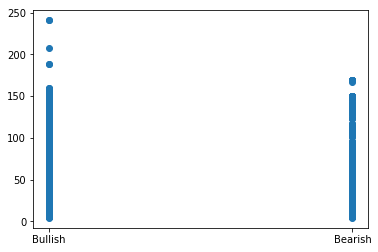

In [60]:
plt.scatter(data=df, x='sentiment', y='length',cmap='coolwarm')